# COGS 108 - Final Project (change this to your project's title)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Overview

In this project, we will be assessing the correlation between the COVID-19 pandemic and the popularity of over a thousand video games from Steam. We will also any trends in the change in popularities of games depending on their genre and tags. (need 3-4 sentences, will need to edit this more.)

# Names

- Thuy Nguyen
- Tony Hu
- Raul Vargas
- Kristen Corpuz
- Megan Li

<a id='research_question'></a>
# Research Question

How did the COVID-19 pandemic affect multiplayer (games with social interaction) games available on steam?

- How did the pandemic affect player counts of multiplayer games versus the single player games? 
- What genres and tags were common in games with highest percent increase in player count?

<a id='background'></a>

## Background & Prior Work

The emergence of COVID-19 in March, 2020, has resulted in mandated quarantines, stay at home rules, and smaller social gatherings in order to slow the spread of COVID-19. A systematic review conducted by Loades et al found that such closures have led to social isolation and loneliness across children and adolescents across various countries such as the United States, China, Europe, Australia, India, Malaysia, Korea, Thailand, Israel, Iran, and Russia (Loades). Other global surveys such as the COVIDiSTRESS survey have also found that such isolation have led to emotional distress, anxiety-related behaviors, and stress (Yamada).

Social media and other platforms that offer social interactions is a common way to lessen the feeling of loneliness. One of these platforms is multiplayer games with features that encourage social interactions. Other methods of promoting social connection and social distancing during lockdowns have surfaced such as the World Health Organization’s initiation of a campaign through the hashtag #PlayApartTogether (Todd). During the pandemic, gaming has allowed people to keep in touch with others more than ever before by acting as an alternative to in-person meetings and hangouts. Social interactions by gaming had increased between friends “for the sake of spending time together and hanging out” (Kelly). Online communication applications like Discord, whose user count doubled in size between 2019 and 2021, has facilitated the ability to interact virtually with other people (Curry).

In the first phase of the pandemic, gamers who usually enjoyed multiplayer games exhibited an increase in playtime. A third of these gamers reported experiencing an increase of importance in having social interaction aspects in video games (Cmentowski). The importance of playing games with friends amongst gamers doubled during the first 3 months of the pandemic compared to the period of time before the pandemic, while the importance of commitment factor decreased dramatically (Cmentowski).

References:

- Curry, David. “Discord Revenue and Usage Statistics (2021).” Business of Apps, 22 Mar. 2021, www.businessofapps.com/data/discord-statistics/.
- Cmentowski, Sebastian, and Jens Krüger. “Playing With Friends - The Importance of Social Play During the COVID-19 Pandemic.” Extended Abstracts of the 2020 Annual Symposium on Computer-Human Interaction in Play, 2020, doi:10.1145/3383668.3419911.
- Kelly, Heather. “They Laughed, They Cried, They Killed Monsters: How Friendships Thrived in Video Games during the Pandemic.” 22 Mar. 2021, www.washingtonpost.com/technology/2021/03/20/video-games-pandemic-friends/
- Loades, Maria Elizabeth et al. “Rapid Systematic Review: The Impact of Social Isolation and Loneliness on the Mental Health of Children and Adolescents in the Context of COVID-19.” Journal of the American Academy of Child and Adolescent Psychiatry vol. 59,11 (2020): 1218-1239.e3. doi:10.1016/j.jaac.2020.05.009
- Lufkin, Bryan. “How Online Gaming Has Become a Social Lifeline.” BBC Worklife, BBC, 16 Dec. 2020, www.bbc.com/worklife/article/20201215-how-online-gaming-has-become-a-social-lifeline.
- Todd, Joe. “Social Video Games to Play during the Coronavirus Quarantine.” The Conversation, 14 Jan. 2021, theconversation.com/social-video-games-to-play-during-the-coronavirus-quarantine-134880.
- Yamada, Y., Ćepulić, DB., Coll-Martín, T. et al. COVIDiSTRESS Global Survey dataset on psychological and behavioural consequences of the COVID-19 outbreak. Sci Data 8, 3 (2021), https://doi.org/10.1038/s41597-020-00784-9


# Hypothesis


We hypothesize that over the course of the pandemic, video games with social properties/interactions will gain popularity, displaying an increase in player counts. We believe that the emergence of the pandemic along with corresponding guidelines such as the stay at home rule has led to an increase in time spent at home. With this increase in time spent at home and decrease of in-person social interactions, people are more likely to play video games with social properties/interactions. There may also be an increase in virtual interactions through social media apps like Discord.

# Dataset(s)

Dataset 1 Name: Application Information (csv file)

Link to the dataset: https://data.mendeley.com/datasets/ycy3sy3vj2/1 Number of observations: 2000 Note that there are 1963 games in the dataset out of the 2000 applications before data cleaning This dataset has 2000 rows and 5 columns, containing the game ID in the first column and application type, name, release date, and free to play values in the rest of the four columns.

Dataset 2 Name: Application Genres (csv file)

Link to the dataset: https://data.mendeley.com/datasets/ycy3sy3vj2/1 Number of observations: 2000 This dataset has 2000 rows and 2 columns, containing the game ID in the first column and a list of genres corresponding to each game in the second column.

Dataset 3 Name: Application Tags (csv file)

Link to the dataset: https://data.mendeley.com/datasets/ycy3sy3vj2/1 Number of observations: 2000 This dataset has 2000 rows and 2 columns, containing the game ID in the first column and a list of game tags corresponding to each game in the second column.

Dataset 4 Name: Player Count History Part 1 and Player Count History Part 2 (zip files)

Link to the dataset: https://data.mendeley.com/datasets/ycy3sy3vj2/1 Number of observations: 2000 individual csv files corresponding to each game ID Each Player Count History zip file contains 2000 csv files for each game. Each game’s file has 280,225 rows and 2 columns, containing the date and time in the first column in 5-minute intervals starting from 12/14/2017 12:00 AM to 8/12/2020 11:55 PM and player count for the corresponding date and time in the second column.

## Merging the data

We plan to merge datasets 1, 2, and 3 on the game ID using an inner merge and only keeping the rows that exist in all 3 datasets after individually pruning rows in each dataset. After cleaning the top 5 games for selected genres’ (such as single player and multiplayer) player count history files to store monthly averaged player counts starting from November 01, 2019 to July 01, 2020. We then look for the percent increase in the average monthly number of player counts for the 4 months before vs 4 months during the pandemic and merge this information with our previously combined dataset using the game ID.

# Setup

In [1]:
# importing libraries we might need later
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import datetime
import csv
import glob
import ntpath
import statistics

# Data Cleaning

## Cleaning Application Genres Data

First we will import the file `applicationGenres.csv` file from the `datasets` folder and store it under the variable `df_genre`

In [2]:
# Read applicationGenres.csv into dataframe storing only IDs with genres
with open('./datasets/applicationGenres.csv') as f:
    genresDict = {} # Store distinct genres
    IDs = []
    genres = []
    for line in f:
        if ',' in line:
            cleanLine = line.strip().split(',')
            IDs.append(cleanLine[0])
            genres.append(cleanLine[1:])
            for genre in cleanLine[1:]: genresDict.setdefault(genre)
df_genre = pd.DataFrame({'ID':IDs, 'Genres':genres},)
df_genre["ID"] = pd.to_numeric(df_genre["ID"])
print(df_genre.shape)
df_genre.head()

(1832, 2)


,ID,Genres
0,578080,"[Action, Adventure, Massively Multiplayer]"
1,570,"[Action, Free to Play, Strategy]"
2,730,"[Action, Free to Play]"
3,359550,[Action]
4,271590,"[Action, Adventure]"


We then one-hot encode genres values to transform the list form as seen above into their own columns with 0 or 1 values representing false or true, respectively. 

In [3]:
df_genre = df_genre.drop('Genres', 1).join(df_genre.Genres.str.join('|').str.get_dummies())
print(df_genre.shape)
df_genre.head()

(1832, 27)


,ID,60,Action,Adventure,Animation & Modeling,Audio Production,Casual,Design & Illustration,Early Access,Education,...,Racing,Sexual Content,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Violent,Web Publishing
0,578080,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,570,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,730,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,359550,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,271590,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Next, we will look at all columns that has at least one observation with a value 1 for df_genre.

In [4]:
(df_genre.loc[:, df_genre.columns != 'ID'] > 0).any()

60                       True
Action                   True
Adventure                True
Animation & Modeling     True
Audio Production         True
Casual                   True
Design & Illustration    True
Early Access             True
Education                True
Free to Play             True
Gore                     True
Indie                    True
Massively Multiplayer    True
Nudity                   True
Photo Editing            True
RPG                      True
Racing                   True
Sexual Content           True
Simulation               True
Software Training        True
Sports                   True
Strategy                 True
Utilities                True
Video Production         True
Violent                  True
Web Publishing           True
dtype: bool

It seems like all the genres describe at least 1 game. However, we will be dropping the column labeled '60' due its ambiguity and lack of a legend-related explanation from the source.

In [5]:
df_genre.drop('60', inplace=True, axis=1)
print(list(df_genre.columns))
df_genre.shape

['ID', 'Action', 'Adventure', 'Animation & Modeling', 'Audio Production', 'Casual', 'Design & Illustration', 'Early Access', 'Education', 'Free to Play', 'Gore', 'Indie', 'Massively Multiplayer', 'Nudity', 'Photo Editing', 'RPG', 'Racing', 'Sexual Content', 'Simulation', 'Software Training', 'Sports', 'Strategy', 'Utilities', 'Video Production', 'Violent', 'Web Publishing']


(1832, 26)

## Cleaning Application Information Data

Next, we will import the file `applicationInformation.csv` file from the `datasets` folder and store it under the variable ``df_info``.

In [6]:
# Get the applicationInformation.csv and remove rows that are not games and empty
df_info = pd.read_csv("./datasets/applicationInformation.csv", engine="python")
# renaming the appid column to ID, matching the ID column for df_genre
df_info = df_info.rename(columns={'appid': 'ID'})
print(df_info.shape)
df_info.head()

(2000, 5)


,ID,type,name,releasedate,freetoplay
0,578080,game,PLAYERUNKNOWN'S BATTLEGROUNDS,21-Dec-17,0.0
1,570,game,Dota 2,9-Jul-13,1.0
2,730,game,Counter-Strike: Global Offensive,21-Aug-12,1.0
3,622590,NaN,PLAYERUNKNOWN'S BATTLEGROUNDS (Test Server),NaN,NaN
4,359550,game,Tom Clancy's Rainbow Six Siege,1-Dec-15,0.0


Since we will only be exploring data about video games, we will be dropping any observations with non-game value found in the 'type' column. Then, we drop the 'type' column because we reduced the dataframe to contain only the 'type' value, game.

In [7]:
df_info = df_info[df_info.type == 'game'].drop(columns='type')
df_info.head()

,ID,name,releasedate,freetoplay
0,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,21-Dec-17,0.0
1,570,Dota 2,9-Jul-13,1.0
2,730,Counter-Strike: Global Offensive,21-Aug-12,1.0
4,359550,Tom Clancy's Rainbow Six Siege,1-Dec-15,0.0
5,271590,Grand Theft Auto V,13-Apr-15,0.0


## Cleaning Application Tags Data

Next, we will import the file `applicationTags.csv` file from the `datasets` folder and store it under the variable 'df_tags'.

In [8]:
with open('./datasets/applicationTags.csv') as f:
    tagDict = {} # Store distinct genres
    IDs = []
    tags = []
    for line in f:
        if ',' in line:
            cleanLine = line.strip().split(',')
            IDs.append(cleanLine[0])
            tags.append(cleanLine[1:]) 
            for tag in cleanLine[1:]: tagDict.setdefault(tag)
df_tags = pd.DataFrame({'ID':IDs, 'Tags':tags},)
# change the 'ID' column to be of numerics type to prepare for merging the data frames together.
df_tags["ID"] = pd.to_numeric(df_tags["ID"])
print(df_tags.shape)
df_tags.head()

(1945, 2)


,ID,Tags
0,578080,"[Survival, Shooter, Multiplayer, PvP, FPS, Thi..."
1,570,"[Free to Play, MOBA, Strategy, Multiplayer, Te..."
2,730,"[FPS, Multiplayer, Shooter, Action, Team-Based..."
3,359550,"[FPS, Multiplayer, Tactical, Action, Shooter, ..."
4,271590,"[Open World, Action, Multiplayer, Third Person..."


Similar to how we cleaned the genres data, we one-hot encoded the tag values, separating tags into their own columns containing 0 or 1 values, representing false or true, respectively. 

In [9]:
df_tags = df_tags.drop('Tags', 1).join(df_tags.Tags.str.join('|').str.get_dummies())
print(df_tags.shape)
df_tags.head()

(1945, 340)


,ID,1980s,1990's,2.5D,2D,2D Fighter,3D,3D Platformer,3D Vision,4 Player Local,...,Warhammer 40K,Web Publishing,Werewolves,Western,Word Game,World War I,World War II,Wrestling,Zombies,e-sports
0,578080,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,570,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,730,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,359550,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,271590,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


All dataframes share an ID column where each game can be mapped to an ID. We will merge all 3 datasets into 1 joint dataset using game IDs to cater downstream data analysis and exploration. 

`df_genre` has the lowest number of rows/observations; therefore, we will use its number of observations as the lower bound for merging the datasets. The merged dataset will be stored under the variable named `combined_df`.

1. Merge `df_genre` and `df_tags` on `df_genre` to give us `df_genre_tags`
2. Merge `df_info` and `df_genre_tags` on `df_genre_tags` to give us `combined_df`

In [10]:
 df_genre_tags = pd.merge(df_genre, df_tags, on='ID') # shape = (1825, 365) after merging
combined_df = pd.merge(df_info, df_genre_tags, on='ID') # shape = (1803, 369) after merging
print(combined_df.shape)
combined_df.head()

(1803, 368)


,ID,name,releasedate,freetoplay,Action_x,Adventure_x,Animation & Modeling_x,Audio Production_x,Casual_x,Design & Illustration_x,...,Warhammer 40K,Web Publishing_y,Werewolves,Western,Word Game,World War I,World War II,Wrestling,Zombies,e-sports
0,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,21-Dec-17,0.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,570,Dota 2,9-Jul-13,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,730,Counter-Strike: Global Offensive,21-Aug-12,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,359550,Tom Clancy's Rainbow Six Siege,1-Dec-15,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,271590,Grand Theft Auto V,13-Apr-15,0.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Reducing Dataframe

There are a lot of columns on our merged dataset, `combined_df`. Let's take a look at what those columns are and decide which we want to keep depending on how they relate to our research question.

In [11]:
print(list(combined_df.columns[1:]))

['name', 'releasedate', 'freetoplay', 'Action_x', 'Adventure_x', 'Animation & Modeling_x', 'Audio Production_x', 'Casual_x', 'Design & Illustration_x', 'Early Access_x', 'Education_x', 'Free to Play_x', 'Gore_x', 'Indie_x', 'Massively Multiplayer_x', 'Nudity_x', 'Photo Editing_x', 'RPG_x', 'Racing_x', 'Sexual Content_x', 'Simulation_x', 'Software Training_x', 'Sports_x', 'Strategy_x', 'Utilities_x', 'Video Production_x', 'Violent_x', 'Web Publishing_x', '1980s', "1990's", '2.5D', '2D', '2D Fighter', '3D', '3D Platformer', '3D Vision', '4 Player Local', '4X', '6DOF', 'Abstract', 'Action_y', 'Action RPG', 'Action-Adventure', 'Addictive', 'Adventure_y', 'Agriculture', 'Aliens', 'Alternate History', 'America', 'Animation & Modeling_y', 'Anime', 'Arcade', 'Arena Shooter', 'Artificial Intelligence', 'Assassin', 'Asynchronous Multiplayer', 'Atmospheric', 'Audio Production_y', 'Base-Building', 'Based On A Novel', 'Basketball', 'Batman', 'Battle Royale', "Beat 'em up", 'Beautiful', 'Benchmark',

Looking at all the genres and tags we got from combining the 3 data sets, we decided to keep these columns: ['ID', 'name', 'releasedate', 'freetoplay', 'Free to Play_x', 'Massively Multiplayer_x', 'Asynchronous Multiplayer', 'Casual_y', 'Co-op', 'Co-op Campaign', 'Competitive', 'Free to Play_y', 'Local Co-Op', 'Local Multiplayer', 'Massively Multiplayer_y', 'Multiplayer', 'Online Co-Op', 'Party-Based RPG', 'PvE', 'PvP', 'RPG_x', 'RPG_y', 'Replay Value', 'Singleplayer']. We selected these columns because we believe these features may be directly related to our research questions or may be confounders to the variables we may be investigating for our research questions. For instance, we kept all genres and tags that related to degree of singleplayer-ness and multiplayer-ness. The new data frame will be stored udner the variable named `combined_reduced`

In [12]:
combined_reduced = (combined_df[['ID', 'name', 'releasedate', 'freetoplay', 'Free to Play_x', 'Massively Multiplayer_x', 'Asynchronous Multiplayer', 'Casual_y', 'Co-op', 'Co-op Campaign', 'Competitive', 'Free to Play_y', 'Local Co-Op', 'Local Multiplayer', 'Massively Multiplayer_y', 'Multiplayer', 'Online Co-Op', 'Party-Based RPG', 'PvE', 'PvP', 'RPG_x', 'RPG_y', 'Replay Value', 'Singleplayer', 'Casual_x']]).copy()
print(combined_reduced.shape)
combined_reduced.head()

(1803, 25)


,ID,name,releasedate,freetoplay,Free to Play_x,Massively Multiplayer_x,Asynchronous Multiplayer,Casual_y,Co-op,Co-op Campaign,...,Multiplayer,Online Co-Op,Party-Based RPG,PvE,PvP,RPG_x,RPG_y,Replay Value,Singleplayer,Casual_x
0,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,21-Dec-17,0.0,0,1,0,0,1,0,...,1,1,0,0,1,0,0,0,0,0
1,570,Dota 2,9-Jul-13,1.0,1,0,0,0,1,0,...,1,1,0,0,1,0,1,1,0,0
2,730,Counter-Strike: Global Offensive,21-Aug-12,1.0,1,0,0,0,1,0,...,1,1,0,0,1,0,0,0,0,0
3,359550,Tom Clancy's Rainbow Six Siege,1-Dec-15,0.0,0,0,0,1,1,0,...,1,1,0,0,0,0,0,0,1,0
4,271590,Grand Theft Auto V,13-Apr-15,0.0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,1,0


## Checking for Missingness

We check for missingness and any NaN's values and see if we can fix or drop any of these null observations.

In [13]:
combined_reduced.isna().any()

ID                          False
name                        False
releasedate                  True
freetoplay                  False
Free to Play_x              False
Massively Multiplayer_x     False
Asynchronous Multiplayer    False
Casual_y                    False
Co-op                       False
Co-op Campaign              False
Competitive                 False
Free to Play_y              False
Local Co-Op                 False
Local Multiplayer           False
Massively Multiplayer_y     False
Multiplayer                 False
Online Co-Op                False
Party-Based RPG             False
PvE                         False
PvP                         False
RPG_x                       False
RPG_y                       False
Replay Value                False
Singleplayer                False
Casual_x                    False
dtype: bool

The 'releasedate' column seems to be the only one with missing values. Let's look at which rows have missing values for this column.

In [14]:
combined_reduced[combined_reduced['releasedate'].isna()]

,ID,name,releasedate,freetoplay,Free to Play_x,Massively Multiplayer_x,Asynchronous Multiplayer,Casual_y,Co-op,Co-op Campaign,...,Multiplayer,Online Co-Op,Party-Based RPG,PvE,PvP,RPG_x,RPG_y,Replay Value,Singleplayer,Casual_x
126,219740,Don't Starve,NaN,0.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
823,272230,Sub Rosa,NaN,0.0,0,0,0,1,1,0,...,1,1,0,0,0,0,0,0,0,0
829,224540,Ace of Spades,NaN,1.0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
938,223850,3DMark,NaN,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
943,212480,Sonic & All-Stars Racing Transformed,NaN,0.0,0,0,0,0,1,0,...,1,1,0,0,0,0,0,1,1,0
978,237110,Mortal Kombat Komplete Edition,NaN,0.0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
1234,564310,Serious Sam Fusion 2017 (beta),NaN,0.0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1268,214560,Mark of the Ninja,NaN,1.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1271,202170,Sleeping Dogs�,NaN,1.0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
1570,39550,SpellForce 2 - Anniversary Edition,NaN,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0


Let's see what datatype the cells under the 'releasedate' columns are so we can properly fix our missing values problem.

In [15]:
type(combined_reduced['releasedate'].iloc[0])

str

Researching on our own, we were able to find the release dates missing for the applications above. Since we wanted to be consistent, we are pulling release dates straight from Steam. However, the following games' release dates were delisted from Steam, so we had to pull the release dates from Google. There was also a game removed from Steam by its publisher's request (Warner Bros.). From checking the type, release date is of type str. We will be inputting the missing release dates as str following the convention of other release dates from the data frame and convert the entire column to date time later. 
Games with release date delisted from Steam:
- Don't Starve
- Mortal Kombat Komplete Edition (removed from Steam on March 21 2020)
- Serious Sam Fusion 2017
- Mark of the Ninja
- Sleeping Dogs

We also discovered that 3D Mark is not a game but a bench marking application, therefore, we will be removing it from the reduced data set. 

In [16]:
# Setting the releasedate
combined_reduced.at[126, 'releasedate'] = '23-Apr-13'
combined_reduced.at[823, 'releasedate'] = '25-Mar-21'
combined_reduced.at[829, 'releasedate'] = '12-Dec-12'
combined_reduced.at[943, 'releasedate'] = '20-Feb-13'
combined_reduced.at[978, 'releasedate'] = '19-Apr-11'
combined_reduced.at[1234, 'releasedate'] = '21-Mar-17'
combined_reduced.at[1268, 'releasedate'] = '9-Oct-18'
combined_reduced.at[1271, 'releasedate'] = '14-Oct-14'
combined_reduced.at[1570, 'releasedate'] = '29-Oct-09'
combined_reduced.at[1595, 'releasedate'] = '5-Oct-17'

In [17]:
# removing the miscategorized non-game application from the dataset
combined_reduced.drop(combined_reduced.index[938], inplace=True)
combined_reduced = combined_reduced.reset_index(drop=True)
print(combined_reduced.shape)
combined_reduced.head()

(1802, 25)


,ID,name,releasedate,freetoplay,Free to Play_x,Massively Multiplayer_x,Asynchronous Multiplayer,Casual_y,Co-op,Co-op Campaign,...,Multiplayer,Online Co-Op,Party-Based RPG,PvE,PvP,RPG_x,RPG_y,Replay Value,Singleplayer,Casual_x
0,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,21-Dec-17,0.0,0,1,0,0,1,0,...,1,1,0,0,1,0,0,0,0,0
1,570,Dota 2,9-Jul-13,1.0,1,0,0,0,1,0,...,1,1,0,0,1,0,1,1,0,0
2,730,Counter-Strike: Global Offensive,21-Aug-12,1.0,1,0,0,0,1,0,...,1,1,0,0,1,0,0,0,0,0
3,359550,Tom Clancy's Rainbow Six Siege,1-Dec-15,0.0,0,0,0,1,1,0,...,1,1,0,0,0,0,0,0,1,0
4,271590,Grand Theft Auto V,13-Apr-15,0.0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,1,0


Since the format of the release date inputs are not is not compatible with the DateTime library, we need to add leading 0's to single digit days.

In [18]:
missing_dates = []
for (key, date) in combined_reduced['releasedate'].iteritems():
    if len(date) == 8:
        date = "0" + date
        combined_reduced.at[key, 'releasedate'] = date
    elif len(date) < 8:
        missing_dates.append(key)

names = []
for key in missing_dates:
    names.append(combined_reduced.iloc[key]['name'])

We noticed that some release dates only included month and year, so we had to find the exact release dates for those games and manually add them.

In [19]:
combined_reduced.at[130, 'releasedate'] = '01-Jun-15' # used google with june as key search term
combined_reduced.at[217, 'releasedate'] = '18-Nov-14' # from steam
combined_reduced.at[362, 'releasedate'] = '01-Oct-15' # original date and moth were also in consisten with steam, so date has been directly grabbed form steam
combined_reduced.at[385, 'releasedate'] = '01-Jul-14' # used google with july as key search term
combined_reduced.at[1070, 'releasedate'] = '27-Aug-14' # used google with aug as key search term
combined_reduced.at[1344, 'releasedate'] = '07-Jul-16' # used google with july as key search term
combined_reduced.at[1762, 'releasedate'] = '06-Dec-16' # used google with december and 2012 as key search term

Now that all the 'releasedate' missing values have been filled and all the values under this columns have been formatted properly to be compatible with DateTime library, let's convert them to DateTime type for easier analysis later on.

In [20]:
for (key, date) in combined_reduced['releasedate'].iteritems():
    try:
        converted = datetime.datetime.strptime(date, '%d-%b-%y')
        combined_reduced.at[key, 'releasedate'] = converted
    except ValueError:
        print(date)

Next, we'll be merging duplicated columns by OR the existing columns and set the result to new column.

In [21]:
# using a convertion dictionary method to convert types of multiple columns at once
convert_dict = {'Free to Play_x': bool,
                'Free to Play_y': bool,
                'freetoplay': bool,
                'Casual_x': bool,
                'Casual_y': bool,
                'RPG_x': bool,
                'RPG_y': bool,
                'Massively Multiplayer_x': bool,
                'Massively Multiplayer_y': bool}
combined_reduced = combined_reduced.astype(convert_dict)

In [22]:
# OR-ing the values of duplicated columsn to get appropriate values
combined_reduced = combined_reduced.assign(free_to_play = (combined_reduced['freetoplay'] | combined_reduced['Free to Play_x'] | combined_reduced['Free to Play_y']))
combined_reduced = combined_reduced.assign(Casual = (combined_reduced['Casual_x'] | combined_reduced['Casual_y']))
combined_reduced = combined_reduced.assign(RPG = (combined_reduced['RPG_x'] | combined_reduced['RPG_y']))
combined_reduced = combined_reduced.assign(Massively_Multiplayer = (combined_reduced['Massively Multiplayer_x'] | combined_reduced['Massively Multiplayer_y']))
combined_reduced['free_to_play'] = combined_reduced['free_to_play'].astype('int')
combined_reduced['Casual'] = combined_reduced['Casual'].astype('int')
combined_reduced['RPG'] = combined_reduced['RPG'].astype('int')
combined_reduced['Massively_Multiplayer'] = combined_reduced['Massively_Multiplayer'].astype('int')
# dropping the duplicated columns
combined_reduced.drop(['Free to Play_x', 'Free to Play_y', 'freetoplay', 'Casual_x', 'Casual_y', 'RPG_x', 'RPG_y', 'Massively Multiplayer_x', 'Massively Multiplayer_y'], inplace=True, axis=1)
combined_reduced

,ID,name,releasedate,Asynchronous Multiplayer,Co-op,Co-op Campaign,Competitive,Local Co-Op,Local Multiplayer,Multiplayer,Online Co-Op,Party-Based RPG,PvE,PvP,Replay Value,Singleplayer,free_to_play,Casual,RPG,Massively_Multiplayer
0,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,2017-12-21 00:00:00,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1
1,570,Dota 2,2013-07-09 00:00:00,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,730,Counter-Strike: Global Offensive,2012-08-21 00:00:00,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0
3,359550,Tom Clancy's Rainbow Six Siege,2015-12-01 00:00:00,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,1
4,271590,Grand Theft Auto V,2015-04-13 00:00:00,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,64000,Men of War: Assault Squad,2011-02-24 00:00:00,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1798,227860,Castle Story,2017-08-17 00:00:00,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
1799,429050,Feed and Grow: Fish,2016-01-08 00:00:00,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
1800,209650,Call of Duty: Advanced Warfare,2014-11-03 00:00:00,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0


Finally, we will save our cleaned and properly formatted dataframe in `./datasets/combinedReduced.csv`.

In [23]:
# Save the combined and reduced dataframe into a csv file
combined_reduced.to_csv('./datasets/combinedReduced.csv', index=False, header=True)

# Data Analysis & EDA

In [24]:
sns.set(rc={'figure.figsize':(16.7,8.27)})

For our data analysis, we will explore the player count values stored in `PlayerCountHistoryPart1` and `PlayerCountHistoryPart2` within the `datasets` folder. Specifcally, we will observe how the player counts change over the course of the pandemic.

Before looking at all the files in the `playerCount` folders, we wanted to peek at a smaller set of the data (since the folders contains over ??? games) to get a sense of the trends present. We will be focusing on 2 subsets described below. For each subset, we will graph the player counts over time 4 months before and 4 months after the pandemic. We define the pandemic start data as ?? because ... [REF]. We will also look at the percent change from the 4 months after the pandemic relative to the 4 months before the pandemic.

1. The 5 most popular single player games: Fallout 4, The Elder Scrolls V: Skyrim Special Edition, Cities: Skylines, The Binding of Isaac: Rebirth, and Subnautica

2. The 5 most popular multiplayer games: CS GO, Dota 2, PUBG, Rust, GTA V

## Top 5 Single Player Games, Player Count EDA

Taking the top 5 single player games, we analyzed their player counts before and after the pandemic. Player counts for each game can be found in the Player Counts History Part 1 folder where filenames correspond to the game ID.

First, we extracted the player count files for these five games, and transformed the 5-minute intervals to 1 day-intervals by taking the average of all the entries for that day. Then, we plot their player counts averaged by day from November 01, 2019 to June 01, 2020, labeling the pandemic start date on the line plot.

In [25]:
# 8 month range from November 1, 2019 to July 1, 2020
range_start_date = "2019-11-01 00:00:00"
range_end_date   = "2020-07-01 00:00:00"

'''
Generate the list of dates with monthly intervals from November 1, 2019 to July 1, 2020. 
This is the y-values for downstream plotting
'''
date_df = pd.date_range(start='11/1/2019', end='7/1/2020', freq='MS').to_frame(index = False)
date_df.columns=['Date'] # Set the column name to Date
date_lst = list(date_df['Date'].apply(lambda x: x.strftime('%Y-%m')))
date_lst

['2019-11',
 '2019-12',
 '2020-01',
 '2020-02',
 '2020-03',
 '2020-04',
 '2020-05',
 '2020-06',
 '2020-07']

In [26]:
def plotGame(ID, startDate, endDate, y_values_dict, folder):
    if folder == 'folder1':
        df = pd.read_csv("./datasets/PlayerCountHistoryPart1/"+str(ID)+".csv")
    else:
        df = pd.read_csv("./datasets/PlayerCountHistoryPart2/"+str(ID)+".csv")    
    df['Date']= pd.to_datetime(df['Time'])
    df = df[(df.Date >= startDate) & (df.Date <= endDate)]
    df['Date'] = pd.to_datetime(df['Date']).dt.date
    df['Date'] = df['Date'].apply(lambda x: x.strftime('%Y-%m'))
    df_tmp = df.groupby('Date').mean()
    df_tmp = df_tmp.reset_index()
    y_values_dict.setdefault(ID, list(df_tmp['Playercount']))

In [27]:
game_ID_dict = {377160:'Fallout 4',
                489830: 'The Elder Scrolls V: Skyrim Special Edition',
                255710: 'Cities: Skylines',
                250900: 'The Binding of Isaac: Rebirth',
                264710: 'Subnautica'}
single_player_IDs = list(game_ID_dict.keys())

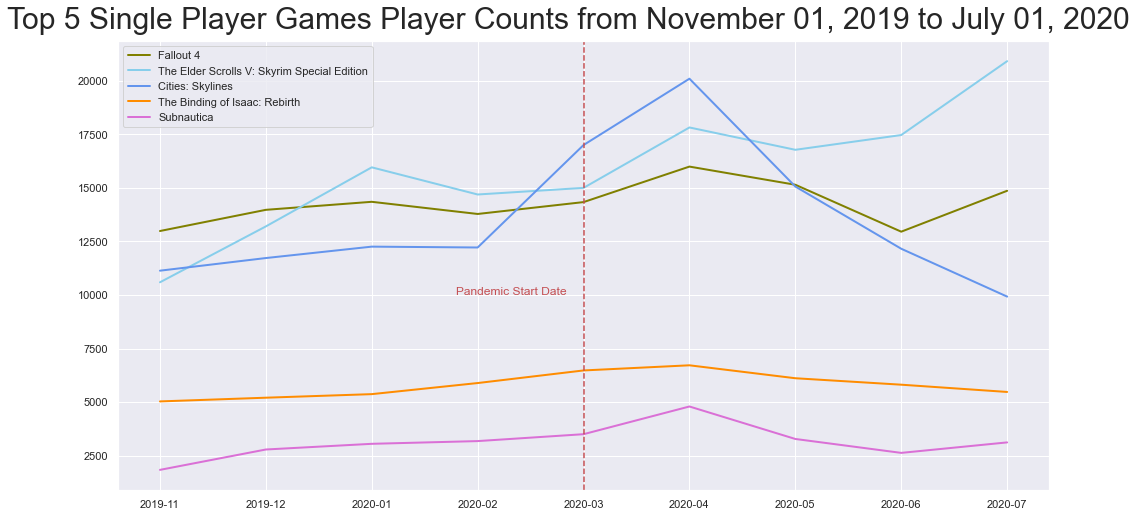

In [28]:
# Line Plot
y_values_dict = {}
for single_player_game in single_player_IDs:
    plotGame(single_player_game, range_start_date, range_end_date, y_values_dict, 'folder1')

# Merge all games into one dataframe
all_games_df = pd.DataFrame({ 'Date': date_lst})
for single_id in game_ID_dict.keys():
    all_games_df[game_ID_dict[single_id]] = y_values_dict[single_id]

# Plot each game's player count history (loop)
plt.plot( 'Date', game_ID_dict[377160], data=all_games_df, marker='', color='olive', linewidth=2)
plt.plot( 'Date', game_ID_dict[489830], data=all_games_df, marker='', color='skyblue', linewidth=2) 
plt.plot( 'Date', game_ID_dict[255710], data=all_games_df, marker='', color='cornflowerblue', linewidth=2)
plt.plot( 'Date', game_ID_dict[250900], data=all_games_df, marker='', color='darkorange', linewidth=2)
plt.plot( 'Date', game_ID_dict[264710], data=all_games_df, marker='', color='orchid', linewidth=2)
plt.figtext(.5,.9,'Top 5 Single Player Games Player Counts from November 01, 2019 to July 01, 2020', fontsize=30, ha='center')
plt.axvline(x='2020-03', linestyle='--', color = 'r')
plt.text(2.8,10000,'Pandemic Start Date',color='r',fontsize=12)
plt.legend();

From the line plot above, we can see a dramatic increase in the average player count history for Cities: Skylines, and a less drastic, but peaks nonetheless with the other 4 games around March-April. We suspect that there may be confounding factors such as game sale events on Steam, but the data set does not include information for us to properly investigate it.

Next, we will be looking at the percent change in the average monthly player counts for 4 months before vs. 4 months during the pandemic.

In [29]:
# Range 1: [Nov 11, 2019, Dec 2019, Jan 2020, Feb 29, 2020]
range_pre_start_date = "2019-11-01 00:00:00"
range_pre_end_date   = "2020-02-29 00:00:00"

# Range 2: [March 1, 2020, April 2020, May 2020, July 1, 2020]
range_post_start_date = "2020-03-01 00:00:00"
range_post_end_date   = "2020-07-01 00:00:00"

In [30]:
pre_y_values_dict = {} # Collect all y-values for each game

for single_player_game in single_player_IDs:
    plotGame(single_player_game, range_pre_start_date, range_pre_end_date, pre_y_values_dict, 'folder1')
    
pandemic_y_values_dict = {} # Collect all y-values for each game
for single_player_game in single_player_IDs:
    plotGame(single_player_game, range_post_start_date, range_post_end_date, pandemic_y_values_dict, 'folder1')

In [31]:
def findPercentIncrease(gameID):
    # Find average of player counts from November 2019 to February 2020 for each game
    pre_game = statistics.mean(pre_y_values_dict[gameID])
    # Find average of player counts from March 2020 to June 2020 for each game
    post_game = statistics.mean(pandemic_y_values_dict[gameID])
    perc_increase = (post_game - pre_game) / pre_game * 100
    return perc_increase

Text(0.5, 0.9, 'Percent Increase in Player Counts for 5 Most Popular Single Player Games')

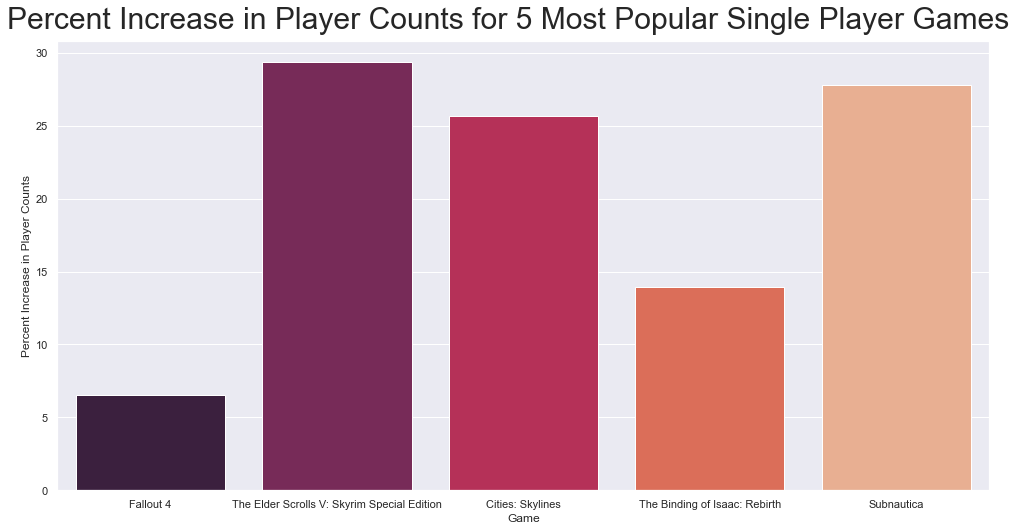

In [32]:
# Find percent change for each game (apply function on column)
perc_fallout = findPercentIncrease(377160)
perc_elder_scrolls = findPercentIncrease(489830)
perc_cities_skylines = findPercentIncrease(255710) 
perc_binding_isaac = findPercentIncrease(250900) 
perc_subnautica = findPercentIncrease(264710) 
games_and_perc = {'Game': ['Fallout 4',
                           'The Elder Scrolls V: Skyrim Special Edition',
                           'Cities: Skylines','The Binding of Isaac: Rebirth',
                           'Subnautica'],
                           'Percent Increase in Player Counts': 
                           [perc_fallout, 
                            perc_elder_scrolls, 
                            perc_cities_skylines, 
                            perc_binding_isaac, 
                            perc_subnautica] }

perc_change = pd.DataFrame(games_and_perc, columns=['Game','Percent Increase in Player Counts'])
ax = sns.barplot(x="Game", y="Percent Increase in Player Counts", data=perc_change, palette='rocket')
plt.figtext(.5,.9,'Percent Increase in Player Counts for 5 Most Popular Single Player Games', fontsize=30, ha='center')

From the bar plot above we see a percentage increase ranging from 7% to almost 30% between the pre to post pandemic time periods for the most popular 5 single player games rated on Steam.

## Top 5 Multilayer Games, Player Count EDA

In [33]:
# storing the id's and names for the selected 5 multipler games.
game_ID_dict = {730:'CS GO',
                570: 'Dota 2',
                578080: 'PUBG',
                252490: 'Rust',
                271590: 'GTA V'}
multi_player_IDs = list(game_ID_dict.keys())

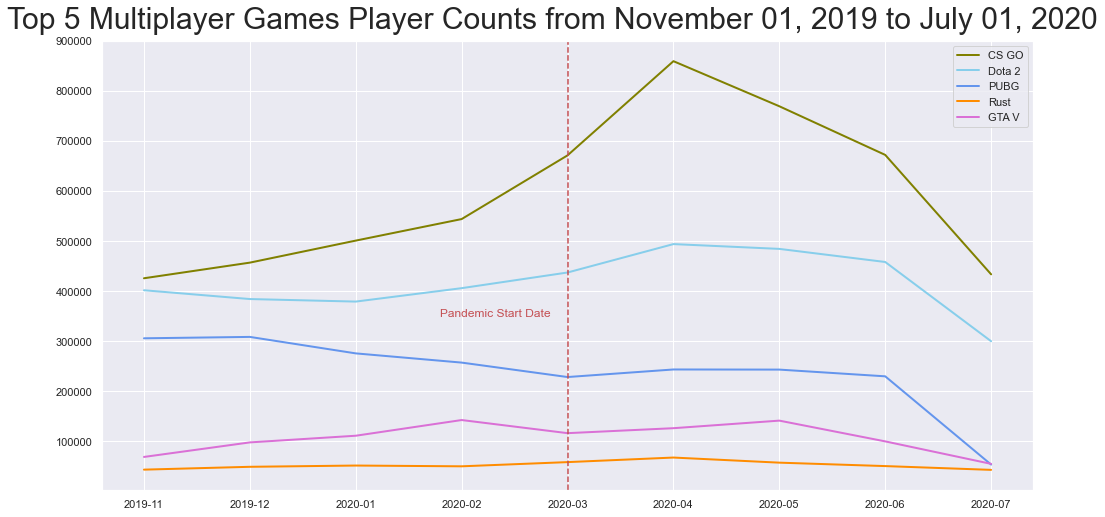

In [34]:
pandemic_y_values_dict = {}
for multi_player_game in multi_player_IDs:
    plotGame(multi_player_game, range_start_date, range_end_date, pandemic_y_values_dict, 'folder1')

# Merge all games into one dataframe (loop thorough dict keys with same key value -> concat to one df)
pandemic_games_df =pd.DataFrame({ 'Date': date_lst, 
                                  game_ID_dict[730]: pandemic_y_values_dict[730],
                                  game_ID_dict[570]: pandemic_y_values_dict[570], 
                                  game_ID_dict[578080]: pandemic_y_values_dict[578080],
                                  game_ID_dict[252490]: pandemic_y_values_dict[252490],
                                  game_ID_dict[271590]: pandemic_y_values_dict[271590]})
# Plot each game's player count history
plt.plot( 'Date', game_ID_dict[730], data=pandemic_games_df, marker='', color='olive', linewidth=2)
plt.plot( 'Date', game_ID_dict[570], data=pandemic_games_df, marker='', color='skyblue', linewidth=2) 
plt.plot( 'Date', game_ID_dict[578080], data=pandemic_games_df, marker='', color='cornflowerblue', linewidth=2)
plt.plot( 'Date', game_ID_dict[252490], data=pandemic_games_df, marker='', color='darkorange', linewidth=2)
plt.plot( 'Date', game_ID_dict[271590], data=pandemic_games_df, marker='', color='orchid', linewidth=2)
plt.figtext(.5,.9,'Top 5 Multiplayer Games Player Counts from November 01, 2019 to July 01, 2020', fontsize=30, ha='center')
plt.axvline(x='2020-03', linestyle='--', color = 'r')
plt.text(2.8,350000,'Pandemic Start Date',color='r',fontsize=12)
#plt.title('Top 5 Multiplayer Games Player Counts from March 2020 to June 2020')
plt.legend();

From the line plot above, we can see a dramatic increase in the average player count history for 'CS GO', a less drastic peak for 'Dota 2', and a slight increase for the other 3 games around March-April. We suspect that there may be confounding factors such as game sale events on Steam, but the data set does not include information for us to properly investigate it.

Next we will be looking at the percent changes in the average monthly player counts for 4 months before vs. 4 months during the pandemic.

In [35]:
# Collect all y-values for each game for the time period before the pandemic
pre_y_values_dict = {} 

for multi_player_game in multi_player_IDs:
    plotGame(multi_player_game, range_pre_start_date, range_pre_end_date, pre_y_values_dict, 'folder1')

# Collect all y-values for each game for the time period during the pandemic
pandemic_y_values_dict = {}

for multi_player_game in multi_player_IDs:
    plotGame(multi_player_game, range_post_start_date, range_post_end_date, pandemic_y_values_dict, 'folder1')

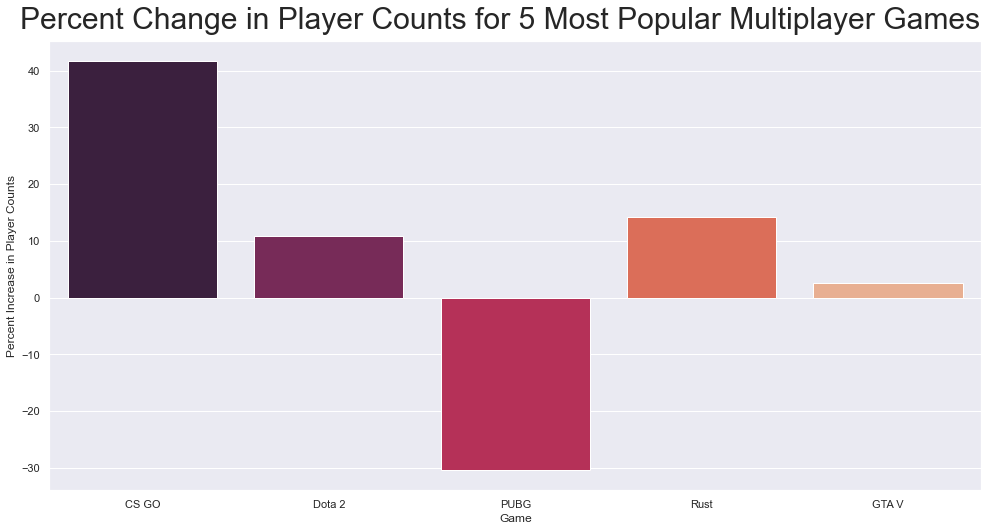

In [36]:
# Find percent change for each game (apply function on column)
y_values_dict = {}
perc_csgo = findPercentIncrease(730)
perc_dota = findPercentIncrease(570)
perc_pubg = findPercentIncrease(578080) 
perc_rust = findPercentIncrease(252490) 
perc_gta_v = findPercentIncrease(271590) 
games_and_perc = {'Game': ['CS GO',
                           'Dota 2',
                           'PUBG',
                           'Rust',
                           'GTA V'],
                           'Percent Increase in Player Counts': 
                           [perc_csgo, 
                            perc_dota, 
                            perc_pubg, 
                            perc_rust, 
                            perc_gta_v] }

perc_change = pd.DataFrame(games_and_perc, columns=['Game','Percent Increase in Player Counts'])
ax = sns.barplot(x="Game", y="Percent Increase in Player Counts", data=perc_change, palette='rocket')
plt.figtext(.5,.9,'Percent Change in Player Counts for 5 Most Popular Multiplayer Games', fontsize=30, ha='center');

Interestingly, PUBG suffered a 30% decrease in the monthly average player count during the pandemic. After some inverstigation on this game, we discovered that the franchise has been on a decline for many reasons. From troubles with esports players and owners for 'PUBG' to poor match-making systems that are considered not newbie-friendly, and even the franchise's negligence for dealing with hackers. Aside from a 40% percent increase for 'CS GO', the remaining 3 games showed no more than 15% percent increase. This many be due to things such as consistent player counts for 'Dota 2' and 'Rust' and flood of returning players due to game updates for 'CS GO'.
More info on PUBG problems:
- https://screenrant.com/pubg-player-count-better-ranked-modes/
- https://www.esportsguide.com/news/state-of-the-community-why-is-pubg-dying

## Generalizing to All Games in the Data Sets

First, we will load all the file names from `PlayerCountHistoryPart1` folder and store that in a list. Then using the path_leaf function, it returns only the ID part of the csv file paths we stored in the list we created.

In [37]:
player_count_file_names1 = glob.glob('./datasets/PlayerCountHistoryPart1/*.csv')
player_count_file_names2 = glob.glob('./datasets/PlayerCountHistoryPart2/*.csv')

In [38]:
def path_leaf(path):
    head, tail = ntpath.split(path)
    tail = tail.replace('.csv', '')
    return int(tail)

In [39]:
'''
Input: Game ID  
Output: Percent increase of player counts from 4 months before and 4 months after the pandemic
'''
def findPercentChange(gameID, folder):
    # (1) Find player counts for 4 months before pandemic
    pre_y_values_dict = {}
    plotGame(gameID, range_pre_start_date, range_pre_end_date, pre_y_values_dict, folder) 
    # (2) Find player counts for 4 months after pandemic
    pandemic_y_values_dict = {}  
    plotGame(gameID, range_post_start_date, range_post_end_date, pandemic_y_values_dict, folder)   
    # (3) Find average of player counts from November 2019 to February 2020 for each game
    pre_game = statistics.mean(pre_y_values_dict[gameID])
    # (4) Find average of player counts from March 2020 to June 2020 for each game
    post_game = statistics.mean(pandemic_y_values_dict[gameID])
    perc_increase = (post_game - pre_game) / pre_game * 100
    return perc_increase

In [55]:
def findAvgChange(gameID, folder):
    # (1) Find player counts for 4 months before pandemic
    pre_y_values_dict = {}
    plotGame(gameID, range_pre_start_date, range_pre_end_date, pre_y_values_dict, folder) 
    # (2) Find player counts for 4 months after pandemic
    pandemic_y_values_dict = {}  
    plotGame(gameID, range_post_start_date, range_post_end_date, pandemic_y_values_dict, folder)   
    # (3) Find average of player counts from November 2019 to February 2020 for each game
    pre_game = statistics.mean(pre_y_values_dict[gameID])
    # (4) Find average of player counts from March 2020 to June 2020 for each game
    post_game = statistics.mean(pandemic_y_values_dict[gameID])
    change = post_game - pre_game
    return change

Cross reference with the ID's present in the `combined_reduced` dataset, we only look for the percent change in player count comparing pre and during the pandemic for csv files with ID's matching that of the `combined_reduced` data set. Note that the cell below takes about a little less than 10 minutes to run because it calculcates the percent increase for all games.

In [40]:
'''
Not needed anymore, used to generate percentChange.csv file in dataset folder.

all_IDs = list(combined_reduced['ID'])
percent_change_dict = {} # Key: game ID, Value: % change
for fileName in player_count_file_names1:
    currID = path_leaf(fileName)
    if currID in all_IDs:
        percent_change_dict.setdefault(currID,findPercentChange(currID, 'folder1'))
for fileName in player_count_file_names2:
    currID = path_leaf(fileName)
    if currID in all_IDs:
        percent_change_dict.setdefault(currID,findPercentChange(currID, 'folder2'))

sorted_dict = dict( sorted(percent_change_dict.items(),
                           key=lambda item: item[1],
                           reverse=True))

with open('./datasets/percentChange.csv', 'w') as csv_file:  
    writer = csv.writer(csv_file)
    for key, value in sorted_dict.items():
       writer.writerow([key, value])

''' 

"\nNot needed anymore, used to generate percentChange.csv file in dataset folder.\n\nall_IDs = list(combined_reduced['ID'])\npercent_change_dict = {} # Key: game ID, Value: % change\nfor fileName in player_count_file_names1:\n    currID = path_leaf(fileName)\n    if currID in all_IDs:\n        percent_change_dict.setdefault(currID,findPercentChange(currID, 'folder1'))\nfor fileName in player_count_file_names2:\n    currID = path_leaf(fileName)\n    if currID in all_IDs:\n        percent_change_dict.setdefault(currID,findPercentChange(currID, 'folder2'))\n\nsorted_dict = dict( sorted(percent_change_dict.items(),\n                           key=lambda item: item[1],\n                           reverse=True))\n\nwith open('./datasets/percentChange.csv', 'w') as csv_file:  \n    writer = csv.writer(csv_file)\n    for key, value in sorted_dict.items():\n       writer.writerow([key, value])\n\n"

We sort the dictionary by descending percent change order. Then, we grab the first 10 games and last 10 games in the sorted dictionary to peek at the top 10 games with highest percent increase and the 10 games with lowest percent increase. 

Since the process of calculating the percent change in player count took a long time, we will save the dictionary of game IDs and their percent change as a separate csv file for quicker access.

In [56]:
all_IDs = list(combined_reduced['ID'])
avg_change_dict = {}

In [57]:
 # Key: game ID, Value: % change
for fileName in player_count_file_names1:
    currID = path_leaf(fileName)
    if currID in all_IDs:
        avg_change_dict.setdefault(currID,findAvgChange(currID, 'folder1'))
for fileName in player_count_file_names2:
    currID = path_leaf(fileName)
    if currID in all_IDs:
        avg_change_dict.setdefault(currID,findAvgChange(currID, 'folder2'))


In [58]:
sorted_avg = dict( sorted(avg_change_dict.items(),
                           key=lambda item: item[1],
                           reverse=True))

with open('./datasets/avgChange.csv', 'w') as csv_file:  
    writer = csv.writer(csv_file)
    for key, value in sorted_avg.items():
       writer.writerow([key, value])

Next we will store the data from the `percentChange.csv` to a dataframe. Then, we will merge that data frame with the data frame `combined_reduced`, adding a 'percent_change' columns for all rows of observations, and storing that new dataframe into the variable named `combined_reduced_df`

In [42]:
df_percent = pd.read_csv('./datasets/percentChange.csv', names=['ID', 'percent_change'])
print(df_percent.shape)
df_percent.head()

(1802, 2)


,ID,percent_change
0,551670,388140.070693
1,601340,66033.916763
2,391660,38354.883328
3,444480,29435.763206
4,444460,20300.782441


In [59]:
df_avg_change = pd.read_csv('./datasets/avgChange.csv', names=['ID', 'average_change'])
print(df_avg_change.shape)
df_avg_change.head()

(1802, 2)


,ID,average_change
0,730,200385.147262
1,570,42479.706416
2,105600,38524.239601
3,346110,24123.881686
4,381210,11445.243930


In [60]:
combined_reduced_perc = pd.merge(combined_reduced, df_percent, on='ID')
combined_reduced_df = pd.merge(combined_reduced_perc, df_avg_change, on='ID')
print(combined_reduced_df.shape)
combined_reduced_df.head()

(1802, 22)


,ID,name,releasedate,Asynchronous Multiplayer,Co-op,Co-op Campaign,Competitive,Local Co-Op,Local Multiplayer,Multiplayer,...,PvE,PvP,Replay Value,Singleplayer,free_to_play,Casual,RPG,Massively_Multiplayer,percent_change,average_change
0,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,2017-12-21 00:00:00,0,1,0,1,0,0,1,...,0,1,0,0,0,0,0,1,-30.362385,-87095.822109
1,570,Dota 2,2013-07-09 00:00:00,0,1,0,1,0,0,1,...,0,1,1,0,1,0,1,0,10.825284,42479.706416
2,730,Counter-Strike: Global Offensive,2012-08-21 00:00:00,0,1,0,1,0,0,1,...,0,1,0,0,1,0,0,0,41.662009,200385.147262
3,359550,Tom Clancy's Rainbow Six Siege,2015-12-01 00:00:00,0,1,0,1,0,0,1,...,0,0,0,1,0,1,0,1,4.692799,3934.652540
4,271590,Grand Theft Auto V,2015-04-13 00:00:00,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,2.501970,2630.072117


## Finding Correlation between Percent Increase and Genres/Tags

In [45]:
sorted_dict = df_percent.to_dict('dict')

In [46]:
# games with the highest percent increase in player count
top_10_perc_change = {k: sorted_dict[k] for k in list(sorted_dict)[:10]}
# games with the lowest percent increase in player count
lowest_10_perc_change = {k: sorted_dict[k] for k in list(sorted_dict)[-10:]}

In [47]:
# To map the dictionary with game ID and percent change to the corresponding game names
def findGameNames(perc_change_dict):
    game_names = {}
    for k in perc_change_dict.keys():
        currName = (combined_reduced[combined_reduced['ID'] == k].name.to_string())[7:]
        game_names.setdefault(k, currName)
    return game_names

In [48]:
# Get names of 10 highest percent increase games using their IDs
top_10_names = findGameNames(top_10_perc_change)
# Get names of 10 lowest percent increase games using their IDs
lowest_10_names = findGameNames(lowest_10_perc_change)

/Users/thuytee/opt/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


The output of the code above is displayed in the table below.

The 10 Games with Highest Percent Increase

| Game ID     | Game Name                      | Percent Change   |
| ----------- | -----------------------------  | ------------------ |
| 551670      | TWIN BROS                      | +388,140% |
| 438020      | AI: Rampage                    | +17,741%  |
| 444490      | POLYWAR                        | +13,187%  |
| 461880      | Hyposphere                     | +11,541%  |
| 412290      | The Dreamlord                  | +8,033%   |
| 473470      | Purgatory                      | +3,921%   |
| 504880      | Pixel Puzzles 2: RADical ROACH | +3,289%   |
| 533340      | Captivity                      | +2,061%   |
| 448470      | Bacteria                       | +1,835%   |
| 513620      | Skytime                        | +1,781%   |


The 10 Games with Lowest Percent Increase

| Game ID     | Game Name                          | Percent Change |
| ----------- | ---------------------------------- | -------------- |
| 533180      | Campfire: One of Us Is the Killer  | -90%  |
| 513570      | Wooden House                       | -90%  |
| 485950      | Rise of the Ancients               | -88%  |
| 412050      | HordeZ                             | -78%  |
| 433850      | 1Z1                                | -78%  |
| 503770      | Elven Assassin                     | -74%  |
| 448070      | Red Risk                           | -70%  |
| 454180      | CrazyCars3D                        | -69%  |
| 517160      | Richie's Plank Experience          | -68%  |
| 536930      | MOBIUS FINAL FANTASY               | -65%  |

Now that we having the percent change for each game from before and after the pandemic, we want to look at each games' corresponding genres and tag values to see if there are any patterns that can be correlated with higher percent increase.

We want to look at these genre and tag values:

- Asynchronous Multiplayer because there are interactions between more than one player even though it is not live
- Local Multiplayer because families at home can play together
- Multiplayer because casual online gamers can play games together live
- Massively_Multiplayer because advanced online gamers can compete with each other live
- Singleplayer because we want to be able to compare the gaming activity with multiplayer

In [61]:
subset_df = combined_reduced_df[['ID', 
                              'Asynchronous Multiplayer', 
                              'Local Multiplayer', 
                              'Multiplayer', 
                              'Massively_Multiplayer', 
                              'Singleplayer', 
                              'percent_change', 
                              'average_change']]
subset_df.head()

,ID,Asynchronous Multiplayer,Local Multiplayer,Multiplayer,Massively_Multiplayer,Singleplayer,percent_change,average_change
0,578080,0,0,1,1,0,-30.362385,-87095.822109
1,570,0,0,1,0,0,10.825284,42479.706416
2,730,0,0,1,0,0,41.662009,200385.147262
3,359550,0,0,1,1,1,4.692799,3934.652540
4,271590,0,0,1,0,1,2.501970,2630.072117


In [50]:
subset_df = subset_df.sort_values(by='percent_change', ascending=False)
subset_df['percent_change'].describe()

count      1802.000000
mean        461.017864
std        9421.969829
min         -98.247900
25%          -0.878961
50%          18.937139
75%          45.468876
max      388140.070693
Name: percent_change, dtype: float64

Looking at the our dataframe summary, we see the highest and lowest percent change, which matches what we found previously. We also see that on average, player counts for games increased by 461%; however, the standard deviation is quite large.

Next, we will create 5 bins to categorize games into depending on their percent change. Then, we count the number of games for each bin.

In [ ]:
genres_tags_subset_df = subset_df.groupby(['cut_ex1']).sum().drop(columns=['ID', 'percent_change'])
# Save the test dataframe into a csv file
genres_tags_subset_df.to_csv('./datasets/groupedGenresTags.csv', header=True)
genres_tags_subset_df

,Asynchronous Multiplayer,Local Multiplayer,Multiplayer,Massively_Multiplayer,Singleplayer
cut_ex1,,,,,
Negative,0,18,240,73,298
Less than 100% Increase,4,68,691,173,897
Over 100% Increase,0,13,55,20,73
"Over 10,000% Increase",0,0,0,1,0
"Over 100,000% Increase",0,0,0,0,0


## Generalizing to all Genres and Tags

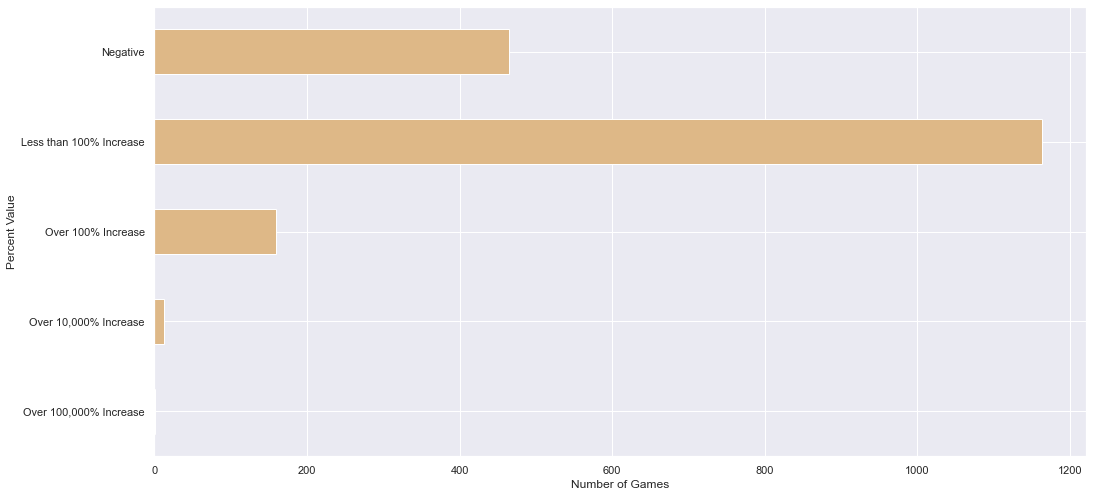

In [ ]:
all_genres_tags_df = combined_reduced_df.sort_values(by='percent_change', ascending=False)
# 6 bins
cut_labels = ['Negative', 
              'Less than 100% Increase', 
              'Over 100% Increase',
              'Over 10,000% Increase', 
              'Over 100,000% Increase']
cut_bins = [-100, 0, 100, 10000, 100000, 1000000]
all_genres_tags_df['cut_ex1'] = pd.cut(all_genres_tags_df['percent_change'], bins=cut_bins, labels=cut_labels)

# Plot
ax1 = all_genres_tags_df.cut_ex1.value_counts().sort_index(ascending=False).plot(kind = 'barh', color='burlywood')
ax1.set_xlabel('Number of Games')
ax1.set_ylabel('Percent Value');

In [ ]:
all_test_df = all_genres_tags_df.groupby(['cut_ex1']).sum().drop(columns=['ID', 'percent_change'])
all_test_df

,Asynchronous Multiplayer,Co-op,Co-op Campaign,Competitive,Local Co-Op,Local Multiplayer,Multiplayer,Online Co-Op,Party-Based RPG,PvE,PvP,Replay Value,Singleplayer,free_to_play,Casual,RPG,Massively_Multiplayer
cut_ex1,,,,,,,,,,,,,,,,,
Negative,0,149,1,19,22,18,240,52,5,4,43,36,298,107,138,167,73
Less than 100% Increase,4,397,9,61,97,68,691,178,15,14,73,78,897,226,273,396,173
Over 100% Increase,0,31,0,5,7,13,55,10,4,2,7,3,73,22,76,35,20
"Over 10,000% Increase",0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,5,1
"Over 100,000% Increase",0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
#all_test_df['social-gaming'] = all_test_df['Asynchronous Multiplayer'] + all_test_df['Co-op'] + all_test_df['Co-op Campaign'] + all_test_df['Co-op'] + all_test_df['Multiplayer'] + all_test_df['Online Co-Op'] + all_test_df['Massively_Multiplayer'] + all_test_df['Local Co-Op'] + all_test_df['Local Multiplayer'] + all_test_df['Party-Based RPG'] + all_test_df['PvP']#all_test_df['non-social-gaming'] = all_test_df['PvE'] + all_test_df['Singleplayer']

In [ ]:
all_test_df['combined-multiplayer'] = all_test_df['Multiplayer'] + all_test_df['Massively_Multiplayer']

We combined the 'multiplayer' and 'massively-multiplayer' columns because for our comparison purposes, they both fall under social interactions.

In [ ]:
multi_single_df = all_test_df[['Singleplayer', 'combined-multiplayer']]
multi_single_df.head()

,Singleplayer,combined-multiplayer
Negative,298,313
Less than 100% Increase,897,864
Over 100% Increase,73,75
"Over 10,000% Increase",0,1
"Over 100,000% Increase",0,0


We can observe from above that both single player and multiplayer games experienced increased in player counts during the pandemic and one game experienced over 10,000% increase in popularity. Also, we hypothesize that some games may have received a decline due to no updates made to the game by the developers. 

In [64]:
def findAvgPercent(df, col_name):
    return (df[df[col_name] == 1])['percent_change'].mean()


In [66]:
def findAvgChange(df, col_name):
    return (df[df[col_name] == 1])['average_change'].mean()


In [65]:
l = ['Asynchronous Multiplayer', 'Co-op',
       'Co-op Campaign', 'Competitive', 'Local Co-Op', 'Local Multiplayer',
       'Multiplayer', 'Online Co-Op', 'Party-Based RPG', 'PvE', 'PvP',
       'Replay Value', 'Singleplayer', 'free_to_play', 'Casual', 'RPG',
       'Massively_Multiplayer']
d = dict()
for c in l:
    d[c] = findAvgPercent(combined_reduced_df, c)
d = dict(sorted(d.items(), key=lambda item: item[1], reverse=True))
pd.DataFrame.from_dict(d, orient='index', columns=['avg_percent_change'])

,avg_percent_change
Casual,1063.058647
RPG,229.557195
free_to_play,105.138214
Massively_Multiplayer,100.071661
Replay Value,65.728729
Local Multiplayer,64.300133
Party-Based RPG,45.551046
Competitive,41.380327
Singleplayer,40.021437
PvE,38.492221


In [67]:
l = ['Asynchronous Multiplayer', 'Co-op',
       'Co-op Campaign', 'Competitive', 'Local Co-Op', 'Local Multiplayer',
       'Multiplayer', 'Online Co-Op', 'Party-Based RPG', 'PvE', 'PvP',
       'Replay Value', 'Singleplayer', 'free_to_play', 'Casual', 'RPG',
       'Massively_Multiplayer']
d = dict()
for c in l:
    d[c] = findAvgChange(combined_reduced_df, c)
d = dict(sorted(d.items(), key=lambda item: item[1], reverse=True))
pd.DataFrame.from_dict(d, orient='index', columns=['average_change'])

,average_change
Competitive,2301.591628
PvP,1617.314134
Online Co-Op,1296.389387
Replay Value,970.074874
free_to_play,903.552272
PvE,857.798570
Co-op,761.039035
Multiplayer,500.394219
RPG,352.488657
Party-Based RPG,282.124314


We can observe that casual type games had the greatest average percent change followed by RPG and then massively multiplayer(100.07%) and local multiplayer(64.3%). Singleplayer games had an average 40%, which shows that more people are looking to socially interact online. 

# Ethics & Privacy

The original data sets did not include any personal information, since our rows of observations only contained data about gaming applications. We may also see some bias in the dataset depending on which website we get it from because the data may be skewed towards gamers and not the general population or vice versa. Therefore, we did not assert any causal claims for the data analysis performed. For possible confounding factors, we merely suggested what may be responsible and provided links for the sources of additional information on those possible confounders. We can also detect the biases in the dataset when we analyze the data and plot the data visually, looking for extreme skewness. We also have some concerns about performing the analysis on the dataset. Websites providing the dataset may not provide background information about the data. Therefore, we will collectively decide whether certain datasets will be credible enough through our own research of outsiders' opinions about the source of said dataset.

# Conclusion & Discussion

During our EDA, we noticed that popular games, both single and multiplayer such as CS Go, received a spike in popularity when the pandemic hit the United States between March and April 2020. From our analysis, we observed that 4 out of the top 5 multiplayer games received a positive percent change in player counts during the pandemic. After finding the percent change in player counts between pre/during pandemic, we noticed that both single player and multi player games across the board had a positive increase in popularity, which aligns with what we originally hypothesized with more people staying at home and playing video games for entertainment and virtually socializing. When we looked at the average percent change, multiplayer games generally received a higher change than singleplayer games.  
We did notice that some games in the dataset have been removed from Steam before the pandemic and we were unable to locate and remove them during some of the analysis. 

# Team Contributions

- Thuy Nguyen: data cleaning, possible confounders additional research, deadline and submission management